In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import math
import numpy as np

Original Image


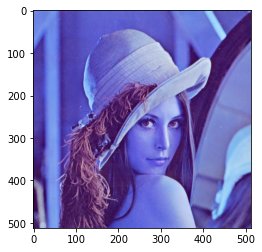

In [3]:
img = cv.imread("Lenna.png")
print("Original Image")
plt.imshow(img)

True

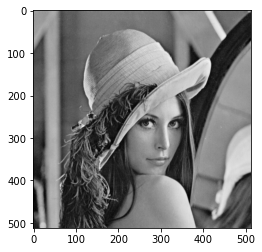

In [4]:
b, g, r = cv.split(img)
imgGray = 0.2989 * r + 0.5870 * g + 0.1140 * b
plt.imshow(imgGray, cmap='gray')
cv.imwrite("Lena_gray.png", imgGray)

# Step 1: Calculate M(0, 0)

In [5]:
f = imgGray
[row, col] = imgGray.shape
s = 0 #Value of M(0,0) to be stored in '''s'''
for i in range(row):
    for j in range(col):
        s += f[i][j]   
print("Value of M(0,0) : {}".format(s))

Value of M(0,0) : 32513375.43790034


# Step 2: Calculate M(0,1) and M(1,0)

In [6]:
m0_1 = 0 #Value of M(0,1) 
m1_0 = 0 #Value of M(1,0) 
for i in range(row):
    for j in range(col):
        m1_0 += (i * f[i][j])   
        m0_1 += (j * f[i][j])
print("Value of M(0,1) : {}".format(m0_1))
print("Value of M(1,0) : {}".format(m1_0))

Value of M(0,1) : 8666436206.577665
Value of M(1,0) : 8045801370.750985


# Step 3: Calculate M(0,2) and M(2,0)

In [7]:
m0_2 = 0 #Value of M(0,2) 
m2_0 = 0 #Value of M(2,0) 
for i in range(row):
    for j in range(col):
        m2_0 += (i * i * f[i][j])   
        m0_2 += (j * j * f[i][j])
print("Value of M(0,2) : {}".format(m0_2))
print("Value of M(2,0) : {}".format(m2_0))

Value of M(0,2) : 3011431021979.4863
Value of M(2,0) : 2696654210888.2407


# Step 4: Calculate Centroid (x’,y’) 

In [9]:
x_dash = float(m1_0/s)
y_dash = float(m0_1/s)
print("""Centroid (X', Y'): {}, {}""".format(x_dash, y_dash))

Centroid (X', Y'): 247.46127593298476, 266.5498764694648


# Step 5: Calculate Centre of Moments

# 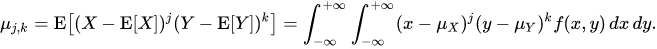

In [10]:
mu0_1 = 0
mu1_0 = 0
mu0_2 = 0
mu2_0 = 0
for i in range(row):
    for j in range(col):
        mu0_1 += (j - y_dash) * f[i][j]
        mu1_0 += (i - x_dash) * f[i][j]
        mu0_2 += math.pow((j - y_dash), 2) * f[i][j]
        mu2_0 += math.pow((i - x_dash), 2) * f[i][j]
print("MU(0,1): {}".format(mu0_1))
print("MU(1,0): {}".format(mu1_0))
print("MU(0,2): {}".format(mu0_2))
print("MU(2,0): {}".format(mu2_0))

MU(0,1): 0.0001253050213563256
MU(1,0): 0.0002046712106675841
MU(0,2): 701393521685.647
MU(2,0): 705629937778.7173


# Step 6: Calculate Scale-invariant moments

In [11]:
h0_1 = 0
h1_0 = 0
h0_2 = 0
h2_0 = 0
for i in range(row):
    for j in range(col):
        h0_1 = mu0_1 / (math.pow(s, ((0+1)/2) + 1 ))
        h1_0 = mu1_0 / (math.pow(s, ((1+0)/2) + 1 ))
        h0_2 = mu0_2 / (math.pow(s, ((0+2)/2) + 1 ))
        h2_0 = mu2_0 / (math.pow(s, ((2+0)/2) + 1 ))

print("h(0,1): {}".format(h0_1))
print("h(1,0): {}".format(h1_0))
print("h(0,2): {}".format(h0_2))
print("h(2,0): {}".format(h2_0))

h(0,1): 6.758890124805047e-16
h(1,0): 1.103986264588106e-15
h(0,2): 0.0006634949663082677
h(2,0): 0.0006675024751688917
